# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте приложить ссылку на данные). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 18,12

In [3]:
df = pd.read_csv('/Users/mikhailsemenov/Documents/GitHub/pyda_homeworks/visualization/data/Spotify_Youtube.csv')

In [4]:
print(df.shape)

(20718, 28)


In [5]:
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [6]:
#Базовая инфо о df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [7]:
#Проверяем на NA значения
df.isna().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [8]:
#Чистим датафрейм - удаляем ненужные атрибуты
to_drop = ['Unnamed: 0', 'Url_spotify', 'Uri', 'Url_youtube', 'Title', 'Description']
df.drop(to_drop, axis=1, inplace=True)
df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,0.772,138.559,222640.0,Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,0.852,92.761,200173.0,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,0.551,108.014,215150.0,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,0.578,120.423,233867.0,Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,0.525,167.953,340920.0,Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


In [9]:
#Смотрю базовые статистики
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [10]:
#Удаляю пропущенные значения 
df.dropna(inplace=True)

In [11]:
#Преобразую типы данных, чтобы потом смотреть на целые числа, а не экспоненциальные 
df[['Views', 'Likes', 'Comments', 'Stream']] = df[['Views', 'Likes', 'Comments', 'Stream']].astype('Int64')

In [12]:
#Смотрю, как это повляило на базовые статистики. Незначительно.
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,1.954900e+04,1.954900e+04,1.954900e+04,1.954900e+04,1.954900e+04
mean,0.621059,0.635170,5.294337,-7.633179,0.095392,0.289106,0.055292,0.191226,0.528950,120.605702,2.246281e+05,9.545626e+07,6.700487e+05,2.786371e+04,1.371101e+08
std,0.165489,0.213555,3.579338,4.618839,0.106243,0.285908,0.192519,0.165197,0.245228,29.619340,1.269126e+05,2.775744e+08,1.805054e+06,1.959074e+05,2.463589e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,2.600000e+01,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.519000,0.508000,2.000000,-8.772000,0.035700,0.044400,0.000000,0.094000,0.339000,96.990000,1.802400e+05,1.911528e+06,2.238000e+04,5.310000e+02,1.781089e+07
50%,0.639000,0.666000,5.000000,-6.516000,0.050700,0.190000,0.000002,0.125000,0.536000,119.964000,2.132530e+05,1.491440e+07,1.279090e+05,3.343000e+03,4.979139e+07
75%,0.742000,0.797000,8.000000,-4.929000,0.104000,0.470000,0.000433,0.234000,0.725000,139.951000,2.519200e+05,7.152989e+07,5.266400e+05,1.449300e+04,1.390828e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [13]:
#Проверяю дубли
df.duplicated().sum()

0

# EDA

In [14]:
#Сформируем ТОП10 артистов по каналам
# Сгруппируем композиции по артистам и просмотрам/прослушиваниям/лайкам/комментам
artist_top10 = df.groupby('Artist')[['Views', 'Stream', 'Likes', 'Comments']].sum()\
            .sort_values(['Views', 'Stream', 'Likes', 'Comments'], ascending=False).head(10)
artist_top10

,Views,Stream,Likes,Comments
Artist,,,,
Ed Sheeran,15460207769,14394881557,83543319,2520822
CoComelon,14601671211,369082154,41713913,0
Katy Perry,13120632075,6607328698,63067090,3153267
Charlie Puth,12167594191,7041186648,86336925,3723796
Luis Fonsi,11628113031,5054326201,66908489,4703428
Justin Bieber,10991060236,12097767422,78584348,7259120
Daddy Yankee,10871926842,5135462481,65518171,4672128
Bruno Mars,10240919227,10897862950,59616146,1924316
Macklemore & Ryan Lewis,10122055560,3982978343,66041410,2425190


In [15]:
#Топ10 просмотров на YT
df_views = df[['Artist', 'Views']].groupby('Artist').sum().sort_values(by='Views', ascending=False).reset_index().head(10)
#Топ10 прослушиваний Spotify
df_streams = df[['Artist', 'Stream']].groupby('Artist').sum().sort_values(by='Stream', ascending=False).reset_index().head(10)
#Топ10 артистов по лайкам
df_likes=df[['Artist', 'Likes']].groupby('Artist').sum().sort_values(by='Likes', ascending=False).reset_index().head(10)
#Топ10 артистов по комментам
df_comments=df[['Artist', 'Comments']].groupby('Artist').sum().sort_values(by='Comments', ascending=False).reset_index().head(10)

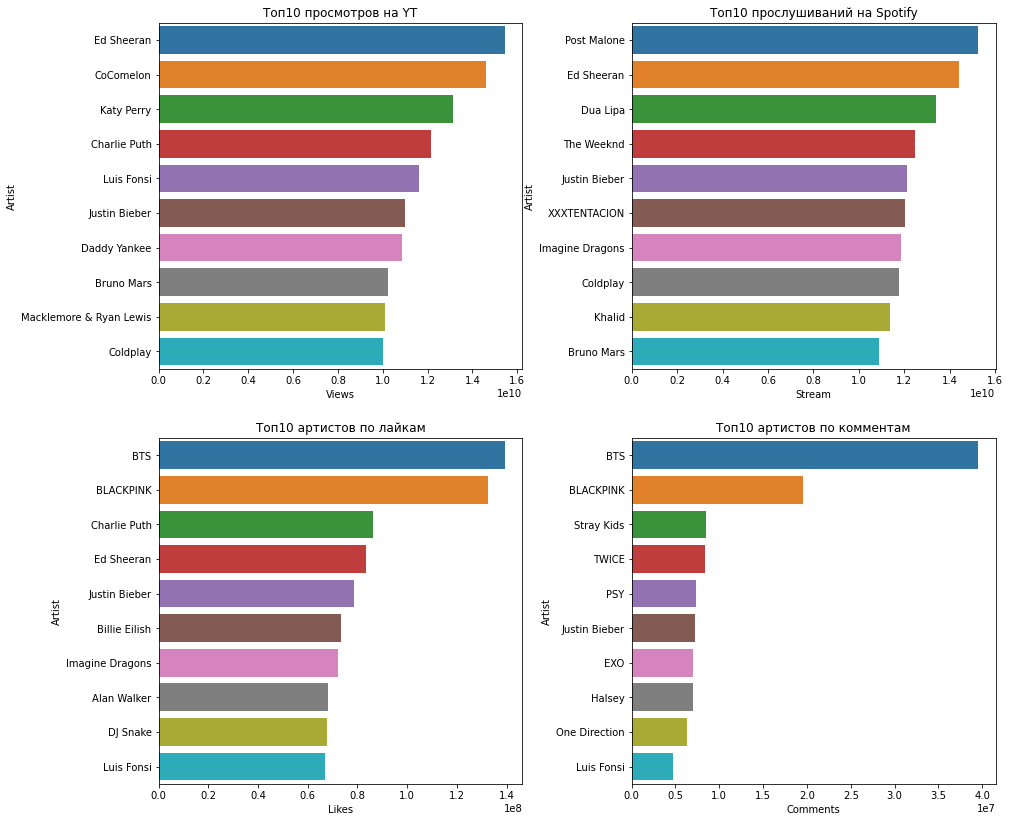

In [38]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,14))
sns.barplot(y='Artist', x='Views', orient='h', ax=ax1, data=df_views)
ax1.set_title('Топ10 просмотров на YT')

sns.barplot(y='Artist', x='Stream', orient='h', ax=ax2, data=df_streams)
ax2.set_title('Топ10 прослушиваний на Spotify')

sns.barplot(y='Artist', x='Likes', orient='h', ax=ax3, data=df_likes)
ax3.set_title('Топ10 артистов по лайкам')

sns.barplot(y='Artist', x='Comments', orient='h', ax=ax4, data=df_comments)
ax4.set_title('Топ10 артистов по комментам')

#for ax in fig.axes:
#   ax.tick_params(labelrotation=90)
    
plt.subplots_adjust(wspace = 0.3)
plt.show()

На графиках видно, что предпочтения по артистам отличается на YT и Spotify. Например, на YT первое место занимает Эд Ширан, а на Spotify Пост Малон. КоКомелон и Кэти Перри из топ-3 YT даже не попали в 10-ку на Spotify. 
Также наблюдаем, что популярность по просмотрам и прослушиваниям не означает лидерство и даже попадание в топ по комментариям и лайкам( Эд на 4 месте по лайкам, Пост Малон вообще не попал в 10-ку).

array([[<AxesSubplot:title={'center':'Danceability'}>,
        <AxesSubplot:title={'center':'Energy'}>,
        <AxesSubplot:title={'center':'Key'}>,
        <AxesSubplot:title={'center':'Loudness'}>],
       [<AxesSubplot:title={'center':'Speechiness'}>,
        <AxesSubplot:title={'center':'Acousticness'}>,
        <AxesSubplot:title={'center':'Instrumentalness'}>,
        <AxesSubplot:title={'center':'Liveness'}>],
       [<AxesSubplot:title={'center':'Valence'}>,
        <AxesSubplot:title={'center':'Tempo'}>,
        <AxesSubplot:title={'center':'Duration_ms'}>,
        <AxesSubplot:title={'center':'Views'}>],
       [<AxesSubplot:title={'center':'Likes'}>,
        <AxesSubplot:title={'center':'Comments'}>,
        <AxesSubplot:title={'center':'Stream'}>, <AxesSubplot:>]],
      dtype=object)

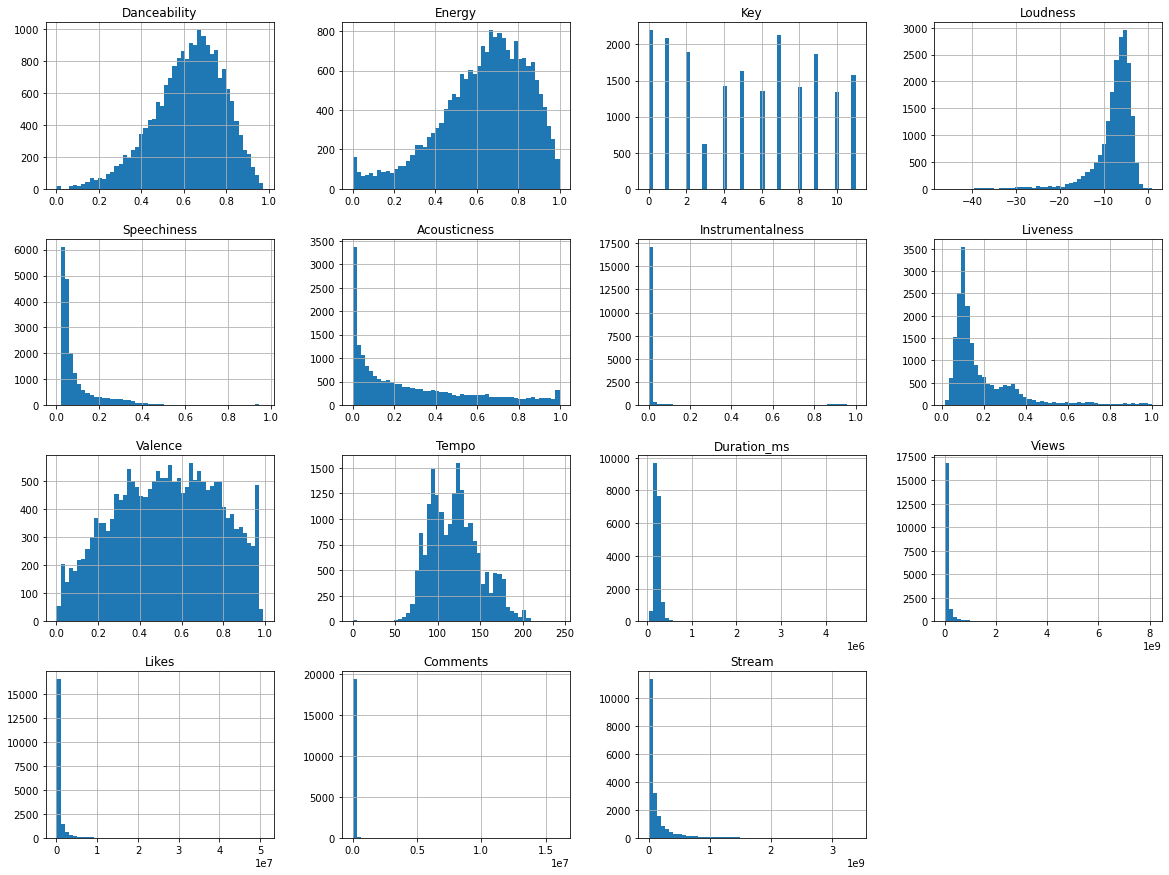

In [17]:
#Посмотрим на распределение численных признаков
num_cols = df.select_dtypes(include='number')
num_cols.hist(bins=50, figsize=(20,15))

Видим близкое к нормальному распределнеи у Danceability, Energy, Valence, Tempo, Loudness
Остальные параметры имеют явный перекос. Например, гистграмма Speechiness показывает нам, что большинство контента на сервисе - это музыка, а, напррмер, не аудиокниги. Также, можем понять, что большинство треков студийные, а не Live, и также немного аккустических версий треков.

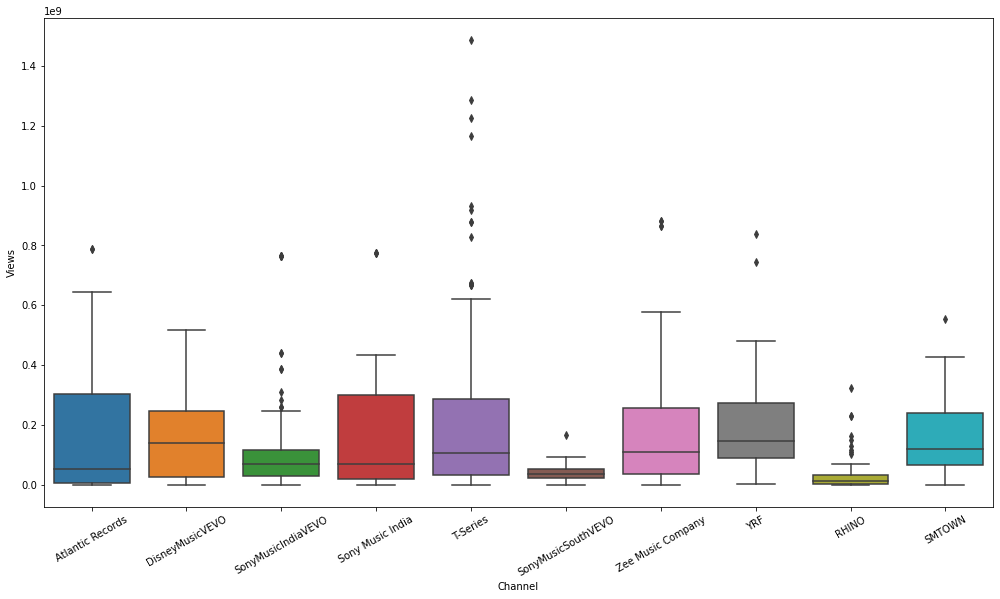

In [29]:
#Сравним просмотры по каналам
plt.figure(figsize=(17, 9))
top_channels = df['Channel'].value_counts().sort_values(ascending=False).head(10).index.values
ax = sns.boxplot(x="Channel", y="Views", 
            data=df[df['Channel'].isin(top_channels)])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

На боксплоте наблюдаем выраженные выбросы у Sony, RHINO, T-Series. 

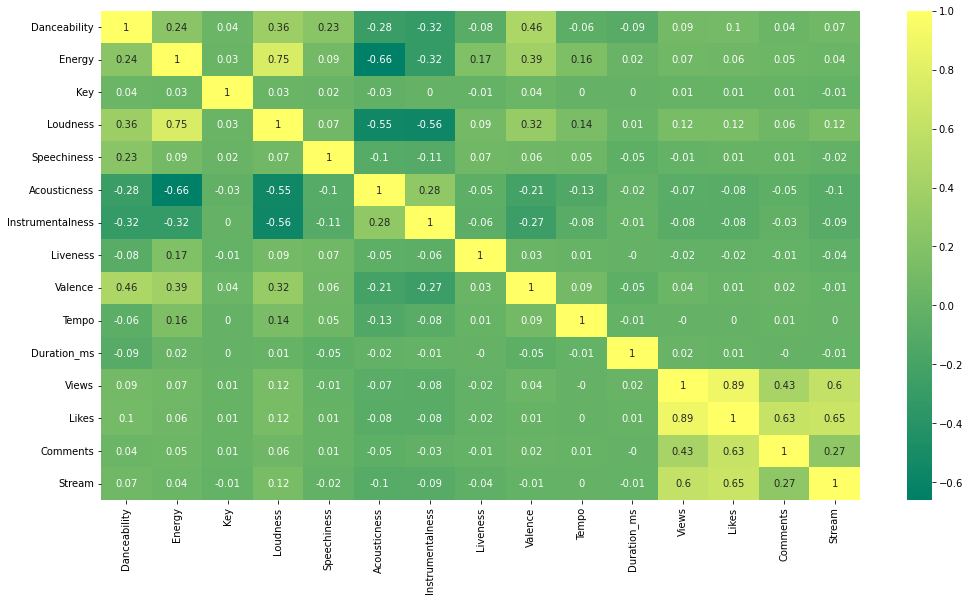

In [30]:
#Строим матрицу корреляции
fig,ax=plt.subplots(figsize=(17, 9))
sns.heatmap(data=df.corr().round(2),annot=True,cmap="summer")
plt.show()

Наблюдаем корреляцию между громкостью и энергией трека, кол-вом прослушиваний и просмотров с лайками и комментариями. При необходимости уже можно детальнее ихизучить и построить отдельные визуализации

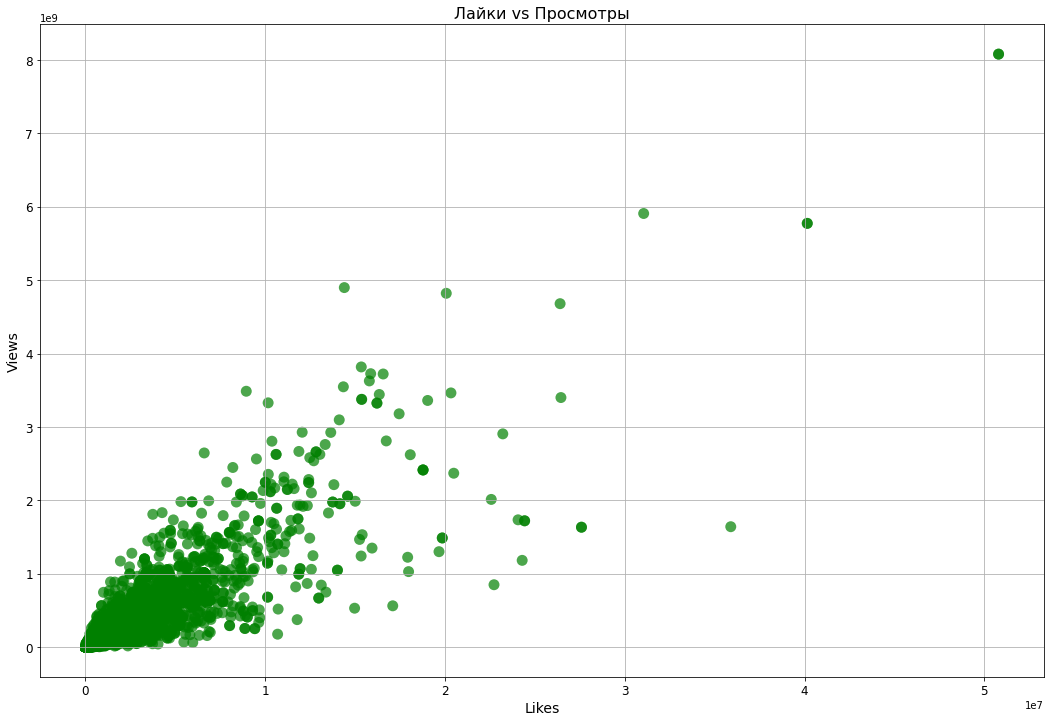

In [31]:
#Например, посмотрим на корреляцию между лайками и просмотрами
plt.scatter(df['Likes'], df['Views'], s=120, c='green', alpha=0.7, edgecolors='none')
plt.title('Лайки vs Просмотры', fontsize=16)
plt.xlabel('Likes', fontsize=14)
plt.ylabel('Views', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True)
plt.show()

In [ ]:
Наблюдаем взаимосвязь между лайками и просмотрами

### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;


#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.